In [1]:
%pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 5.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=0df7f7c4c40156601c8b4598c2a485c72d49dd9ea504ea8d5505d58506ba1500
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


# Library importing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Data importing

In [4]:
data = pd.read_csv("/content/drive/MyDrive/0_professional/1_projects/statistics/12. Survival Analysis/data.csv")

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Preprocessing

In [5]:
# Convert 'Attrition' column to binary (0 or 1)
data['Attrition'] = data['Attrition'].map({'Yes': 1.0, 'No': 0.0})

# Convert categorical variables into dummy variables
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True, dtype=float)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1.0,1102,1,2,1,1,2,94,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,49,0.0,279,8,1,1,2,3,61,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,37,1.0,1373,2,2,1,4,4,92,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,0.0,1392,3,4,1,5,4,56,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,27,0.0,591,2,1,1,7,1,40,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Modeling

First, we'll do the most basic form of lifetime modeling, which uses only one feature to predict the likelihood of the event. In our case, the event is attrition, and the feature is years at the company.

<Axes: xlabel='timeline'>

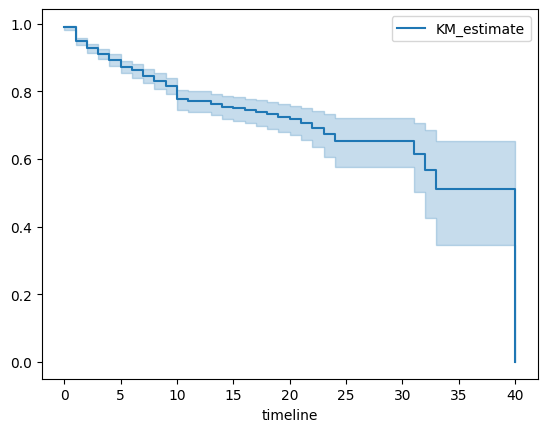

In [6]:
from lifelines import KaplanMeierFitter

T = data[['YearsAtCompany']]
E = data[['Attrition']]

kmf = KaplanMeierFitter()
kmf.fit(T, E)
kmf.plot_survival_function()

This type of plot is very common in survival analysis, and it's called survival function plot.

The survival function is like a roadmap showing the probability of surviving past a certain time. In simpler terms, it tells us the chances of not experiencing an event, like getting sick or a machine breaking down, up to a specific time point.

For instance, if we're tracking how long it takes for an employee to quit, the survival function tells us the probability that the employee will keep working at the company until a certain time.

We have considered only one feature in our model, let's see how the plot looks when we split it into two groups.

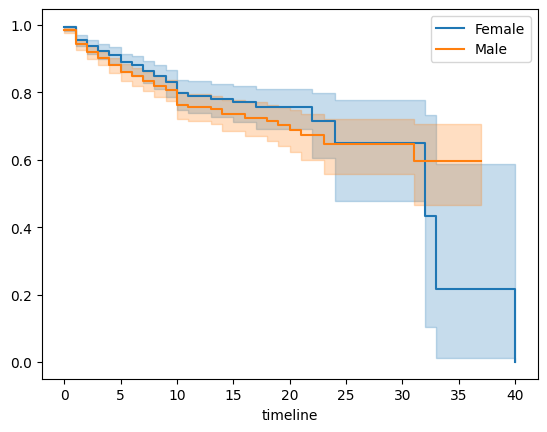

In [7]:
# Adding gender
groups = data['Gender_Male']
ix = (groups == 1)

kmf.fit(T[~ix], E[~ix], label='Female')
ax = kmf.plot_survival_function()

kmf.fit(T[ix], E[ix], label='Male')
ax = kmf.plot_survival_function(ax=ax)

We can see that attrition behaves slightly different depending on the employee's geneder. This indicates that adding more variables could help us be more precise. That's where we can use survival regression.

# Survival regression

In [ ]:
cols_to_keep = [
    "YearsAtCompany", "Attrition", "DailyRate",
    "Education","EnvironmentSatisfaction",
    "JobInvolvement","JobRole_Manager", "Gender_Male",
    "WorkLifeBalance"
    ]
data = data[cols_to_keep]

Cox’s proportional hazard model, allows the modeling of the baseline hazard in two ways: non-parametrically or parametrically. Users can specify parameters like the confidence interval level, baseline estimation method, penalizer to control coefficient size, and L1 versus L2 penalty ratio.

In [ ]:
# Fit the Cox proportional hazards model to the data
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data,
        duration_col="YearsAtCompany",
        event_col="Attrition")

# Make predictions with the model
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1533.14
         time fit was run = 2024-04-11 16:17:44 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
DailyRate                -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Education                -0.11       0.90       0.06            -0.23             0.01                 0.79                 1.01
EnvironmentSatisfaction  -0.25       0.78       0.06            -0.36            -0.13                 0.70                 0.88
JobInvolvement           -0.38       0.68       0.09            -0.55            -0.21                 0.58                 0.81
JobRole_Manager          -1.97       0.14       0.46            -2.88            -1.06                 0.06                 0.35
Gender_Male               0.21       1.24       0.14            -0.05             0.48                 0.95                 1.61
WorkLifeBalance          -0.20       0.82       0.09            -0.38            -0.02                 0.68                 0.98

                          cmp to     z      p   -log2(p)
covariate                                               
DailyRate                   0.00 -1.67   0.10       3.39
Education                   0.00 -1.78   0.07       3.74
EnvironmentSatisfaction     0.00 -4.15 <0.005      14.86
JobInvolvement              0.00 -4.45 <0.005      16.85
JobRole_Manager             0.00 -4.26 <0.005      15.58
Gender_Male                 0.00  1.56   0.12       3.08
WorkLifeBalance             0.00 -2.23   0.03       5.27
---
Concordance = 0.66
Partial AIC = 3080.29
log-likelihood ratio test = 81.96 on 7 df
-log2(p) of ll-ratio test = 47.37

<Axes: xlabel='log(HR) (95% CI)'>

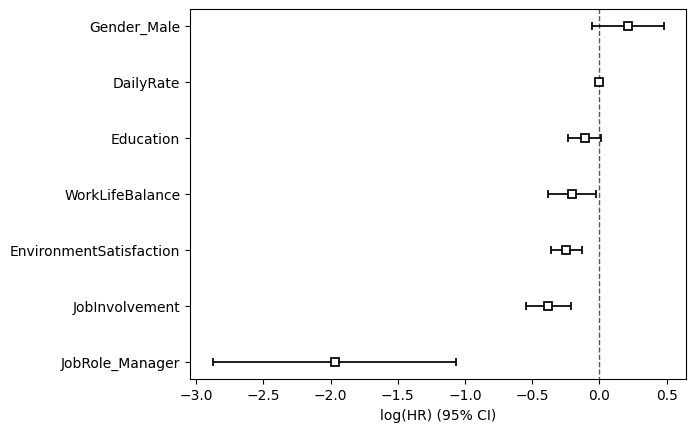

In [ ]:
cph.plot()

The Aalen Additive model incorporates the idea of time-varying coefficients in hazard rate linear function of the covariates. Despite the time-varying coefficients, it assumes non-time-varying covariates.

In [ ]:
from lifelines import AalenAdditiveFitter

aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(data, 'YearsAtCompany', 'Attrition')
aaf.print_summary()

<lifelines.AalenAdditiveFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
       number of subjects = 1470
number of events observed = 237
         time fit was run = 2024-04-11 13:51:54 UTC

---
Empty DataFrame
Columns: []
Index: [DailyRate, Education, EnvironmentSatisfaction, JobInvolvement, JobRole_Manager, Gender_Male, WorkLifeBalance]
---
Concordance = 0.49

<Axes: >

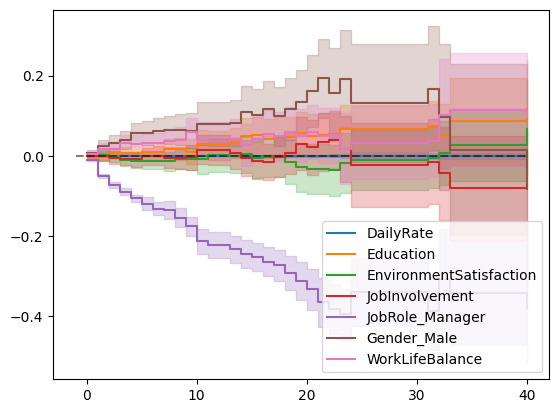

In [ ]:
aaf.plot()

<Axes: >

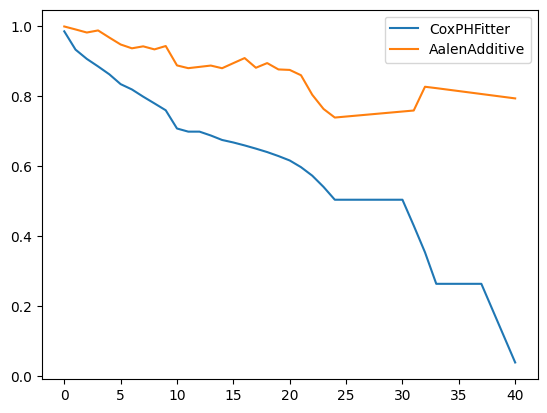

In [ ]:
new_observation = data.iloc[0]
# ax = wft.predict_survival_function(X).rename(columns={0:'WeibullAFT'}).plot()
ax = cph.predict_survival_function(new_observation).rename(columns={0:'CoxPHFitter'}).plot()
aaf.predict_survival_function(new_observation).rename(columns={0:'AalenAdditive'}).plot(ax=ax)